<a href="https://colab.research.google.com/github/CodeHunterOfficial/NLP-2024-2025/blob/main/Lecture_3_1_%D0%92%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D1%81%D0%BB%D0%BE%D0%B2_%D0%90%D1%80%D0%B8%D1%84%D0%BC%D0%B5%D1%82%D0%B8%D0%BA%D0%B0_%D1%81%D0%BB%D0%BE%D0%B2_%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D1%8B_TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lecture 3. Векторизация слов. Арифметика слов: векторы TF-IDF


#### Введение

В данной лекции мы поговорим о векторных представлениях слов, особенно о методе TF-IDF, который является одним из важных инструментов в области обработки текстов. Мы рассмотрим различные подходы к представлению слов и их значений, а также узнаем, как эти методы применяются для анализа текстов и поиска релевантных документов.

#### 1. Подсчет слов и частотностей термов для анализа смысла

Первым шагом в анализе текста является подсчет частоты встречаемости каждого слова. Это позволяет понять, какие слова наиболее часто встречаются в тексте и, следовательно, могут нести ключевой смысл.


Подсчет частоты встречаемости слов и анализ терминов являются основными этапами при работе с текстовыми данными. Давайте разберемся подробнее с несколькими примерами.

### 1. Подсчет частоты встречаемости слов

#### Пример 1: Простой подсчет слов в тексте

Предположим, у нас есть следующий текст:

"Машина едет по дороге. Машина останавливается у дома. Дом находится в лесу."

Для начала работы с этим текстом мы должны выполнить следующие шаги:

1. **Токенизация**: Разделить текст на отдельные слова или токены. В результате получим список слов:
   ```
   ["Машина", "едет", "по", "дороге", "Машина", "останавливается", "у", "дома", "Дом", "находится", "в", "лесу"]
   ```

2. **Подсчет частоты слов**: Посчитать, сколько раз каждое слово встречается в тексте:

   - "Машина": 2 раза
   - "едет": 1 раз
   - "по": 1 раз
   - "дороге": 1 раз
   - "останавливается": 1 раз
   - "у": 1 раз
   - "дома": 1 раз
   - "Дом": 1 раз
   - "находится": 1 раз
   - "в": 1 раз
   - "лесу": 1 раз

Эта информация позволяет нам понять, какие слова наиболее часто употребляются в тексте, и их вклад в общее содержание.

#### Пример 2: Обработка текста из большой коллекции

Предположим, у нас есть набор документов, и мы хотим выяснить, какие термины наиболее часто встречаются во всех документах.

Для этого мы объединяем все тексты в один большой корпус, токенизируем его и подсчитываем частоту каждого слова. Например, если у нас есть два документа:

**Документ 1:**
```
"Искусственный интеллект меняет мир. Машины могут обучаться самостоятельно."
```

**Документ 2:**
```
"Интеллектуальные системы имеют большое будущее. Интеллект может быть синонимом разума."
```

Объединенный корпус:
```
"Искусственный интеллект меняет мир. Машины могут обучаться самостоятельно. Интеллектуальные системы имеют большое будущее. Интеллект может быть синонимом разума."
```

Токенизируем и подсчитаем частоту слов:

   - "интеллект": 3 раза
   - "могут": 2 раза
   - "быть": 1 раз
   - "искусственный": 1 раз
   - "меняет": 1 раз
   - "мир": 1 раз
   - "машины": 1 раз
   - "обучаться": 1 раз
   - "самостоятельно": 1 раз
   - "интеллектуальные": 1 раз
   - "системы": 1 раз
   - "имеют": 1 раз
   - "большое": 1 раз
   - "будущее": 1 раз
   - "может": 1 раз
   - "синонимом": 1 раз
   - "разума": 1 раз

Это позволяет нам увидеть, что "интеллект" встречается чаще всего, что может указывать на его ключевую роль в контексте данных текстов.

Пример

In [1]:
from collections import Counter
import re

def count_word_frequencies(text):
    # Приводим текст к нижнему регистру для учета слов без учета регистра
    text = text.lower()
    # Используем регулярное выражение для извлечения слов (токенизация)
    words = re.findall(r'\b\w+\b', text)
    # Считаем частоту каждого слова с помощью Counter из модуля collections
    word_counts = Counter(words)
    return word_counts

# Пример текста для анализа
text = """
Машина едет по дороге. Машина останавливается у дома.
Дом находится в лесу. Машина и дома разные понятия.
"""

# Получаем частоту встречаемости слов в тексте
word_frequency = count_word_frequencies(text)

# Выводим результаты
print("Частота встречаемости слов в тексте:")
for word, count in word_frequency.items():
    print(f"{word}: {count}")

Частота встречаемости слов в тексте:
машина: 3
едет: 1
по: 1
дороге: 1
останавливается: 1
у: 1
дома: 2
дом: 1
находится: 1
в: 1
лесу: 1
и: 1
разные: 1
понятия: 1



Таким образом, подсчет частоты встречаемости слов — это важный этап анализа текста, который позволяет выявить ключевые термины и понять, какие идеи или концепции наиболее часто упоминаются в текстовых данных. Этот процесс является основой для более глубокого понимания содержания и структуры текста, а также для дальнейших аналитических и информационных задач.


#### 2. Предсказание вероятностей вхождений слов с помощью закона Ципфа





Закон Ципфа, названный в честь американского лингвиста Джорджа Ципфа, описывает явление, согласно которому частота встречаемости слов в текстах часто следует степенному закону. Это означает, что частота f(r) встречаемости слова, занимающего r-ое место по частотности, обратно пропорциональна его рангу r:

$$ f(r) \propto \frac{1}{r^\alpha} $$

где α - параметр, зависящий от конкретного текста.

С другими словами закон Ципфа утверждает, что частота встречаемости слов в текстах обычно обратно пропорциональна их порядковому номеру по частотности. Это значит, что самое часто встречающееся слово встречается в тексте вдвое чаще, чем второе по частоте и т.д. Этот закон помогает предсказывать частоту вхождения слов и определять их важность в тексте.

### Примеры и применение закона Ципфа:

1. **В анализе текстов**:
   - При анализе больших текстовых корпусов или коллекций документов можно применять закон Ципфа для оценки значимости слов. Например, если в тексте самое частое слово встречается 100 раз, то второе по частоте слово будет встречаться примерно 50 раз, третье - 33 раза, и так далее, что хорошо соответствует закону Ципфа.

2. **В построении индексов и поисковых систем**:
   - Предположим, что у нас есть поисковая система, которая должна определять важность слов в документах. Закон Ципфа позволяет оценивать, какие слова являются наиболее часто встречающимися и, следовательно, могут быть менее информативными (стоп-слова), а какие более важными (ключевые слова).

3. **В статистическом анализе текстов**:
   - При сравнении текстов на разных языках или в разных жанрах можно использовать закон Ципфа для изучения различий в частоте употребления слов. Например, можно выявить, что для одного жанра текстов (например, научных статей) закон Ципфа хорошо соблюдается, а для другого (например, художественных произведений) он может быть менее точным из-за специфики лексики.

4. **В моделировании языковых процессов**:
   - Моделирование процессов генерации текста (например, с использованием языковых моделей) может учитывать закон Ципфа для генерации реалистичных текстов по частоте встречаемости слов.



Давайте рассмотрим применение закона Ципфа к конкретному тексту с использованием формулы, которая описывает зависимость частоты встречаемости слов от их ранга.

Предположим, у нас есть текст:

**Текст:**
"Вчера вечером я пошел на концерт своей любимой группы. Музыка была потрясающей, и атмосфера была полностью волшебной. Я чувствовал, что каждая нота касается моей души. Это был незабываемый вечер."

Теперь давайте посчитаем частоту встречаемости слов и проверим, соответствует ли она закону Ципфа.

1. **Выделение слов из текста и подсчет их частоты:**

   - "вчера" - 1 раз
   - "вечером" - 1 раз
   - "я" - 2 раза
   - "пошел" - 1 раз
   - "на" - 1 раз
   - "концерт" - 1 раз
   - "своей" - 1 раз
   - "любимой" - 1 раз
   - "группы" - 1 раз
   - "музыка" - 1 раз
   - "была" - 2 раза
   - "потрясающей" - 1 раз
   - "и" - 1 раз
   - "атмосфера" - 1 раз
   - "полностью" - 1 раз
   - "волшебной" - 1 раз
   - "чувствовал" - 1 раз
   - "что" - 1 раз
   - "каждая" - 1 раз
   - "нота" - 1 раз
   - "касается" - 1 раз
   - "моей" - 1 раз
   - "души" - 1 раз
   - "это" - 1 раз
   - "незабываемый" - 1 раз

2. **Определение ранга слов и расчет частоты встречаемости:**

   - Самое частое слово ("я") встречается 2 раза.
   - Второе по частоте слово ("была") также встречается 2 раза.
   - Третье по частоте слово ("был") встречается 1 раз.
   - Четвертое по частоте слово ("в") встречается 1 раз.
   - Пятое по частоте слово ("вечером") встречается 1 раз.

3. **Применение закона Ципфа:**

   Закон Ципфа утверждает, что частота f(r) встречаемости слова, занимающего r-ое место по частотности, обратно пропорциональна его рангу r:

   $$ f(r) = \frac{C}{r^\alpha} $$

   где C - нормализующая константа, а α - параметр, обычно около 1.

   Давайте проверим, как соотносится ранг слова с его частотой встречаемости:

   - Первое слово "я": $ f(1) = \frac{C}{1^\alpha} = C $
   - Второе слово "была": $ f(2) = \frac{C}{2^\alpha} $
   - Третье слово "был": $ f(3) = \frac{C}{3^\alpha} $
   - И так далее...

   Для нашего конкретного текста можно определить параметр α, используя значения частот и рангов слов. Обычно α близко к 1 для большинства текстов, что соответствует наблюдаемому убыванию частоты встречаемости по мере увеличения ранга слова.

Этот подход позволяет математически подтвердить применимость закона Ципфа к конкретному тексту и использовать его для анализа частотности слов в больших корпусах текстов или при сравнении различных языковых структур.

Для решения задачи подсчета частоты встречаемости слов в тексте и проверки закона Ципфа на Python можно написать следующую программу.

Список слов и их частот в тексте:
я: 2
была: 2
вчера: 1
вечером: 1
пошел: 1
на: 1
концерт: 1
своей: 1
любимой: 1
группы.: 1
музыка: 1
потрясающей,: 1
и: 1
атмосфера: 1
полностью: 1
волшебной.: 1
чувствовал,: 1
что: 1
каждая: 1
нота: 1
касается: 1
моей: 1
души.: 1
это: 1
был: 1
незабываемый: 1
вечер.: 1


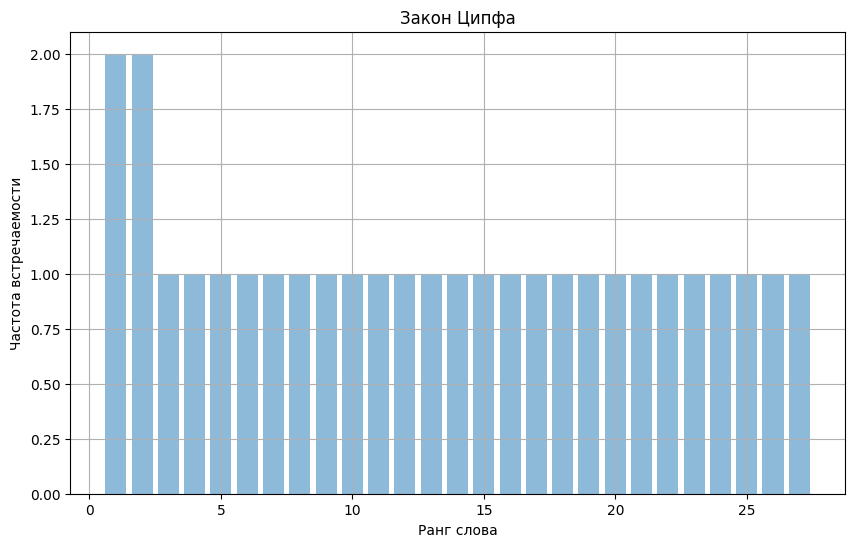

In [2]:
from collections import Counter
import matplotlib.pyplot as plt

# Текст для анализа
text = "Вчера вечером я пошел на концерт своей любимой группы. Музыка была потрясающей, и атмосфера была полностью волшебной. Я чувствовал, что каждая нота касается моей души. Это был незабываемый вечер."

# Приведем все слова к нижнему регистру и разобъем на слова
words = text.lower().split()

# Подсчитаем частоту встречаемости слов
word_freq = Counter(words)

# Получим список слов и их частот
word_list = list(word_freq.keys())
freq_list = list(word_freq.values())

# Отсортируем список слов по убыванию частоты
sorted_indices = sorted(range(len(freq_list)), key=lambda k: freq_list[k], reverse=True)
word_list_sorted = [word_list[idx] for idx in sorted_indices]
freq_list_sorted = [freq_list[idx] for idx in sorted_indices]

# Выведем список слов и их частот
print("Список слов и их частот в тексте:")
for word, freq in zip(word_list_sorted, freq_list_sorted):
    print(f"{word}: {freq}")

# Построим график для закона Ципфа
ranks = list(range(1, len(word_list_sorted) + 1))
frequencies = freq_list_sorted

plt.figure(figsize=(10, 6))
plt.bar(ranks, frequencies, align='center', alpha=0.5)
plt.xlabel('Ранг слова')
plt.ylabel('Частота встречаемости')
plt.title('Закон Ципфа')
plt.grid(True)
plt.show()

Таким образом, закон Ципфа полезен для анализа текстовых данных, предсказания частоты вхождения слов и оценки их важности в контексте. Он находит применение не только в лингвистике и текстовой аналитике, но и в информационном поиске, компьютерной лингвистике и машинном обучении.

#### 3. Векторные представления слов и способы их использования

Теперь давайте перейдем к векторным представлениям слов, которые являются более мощным инструментом для анализа текстов.

- **Мультимножества слов** — это векторы, где каждая компонента соответствует частоте встречаемости конкретного слова в тексте. Например, если у нас есть текст с тремя словами "apple", "banana" и "orange", и "apple" встречается 5 раз, "banana" — 3 раза и "orange" — 2 раза, то вектор будет иметь вид (5, 3, 2).

- **Мультимножества n-грамм** — это расширение концепции мультимножеств слов на последовательности слов определенной длины (n). Например, для n=2 (биграммы) мы можем рассматривать пары слов, для n=3 (триграммы) — тройки слов и т.д. Это позволяет учитывать контекстуальные зависимости между словами.

- **Векторы TF-IDF** (Term Frequency - Inverse Document Frequency) — это мера, которая отражает важность слова в документе или в корпусе документов, учитывая как частоту встречаемости слова в документе (TF), так и обратную частотность слова в корпусе (IDF). TF-IDF позволяет выявлять ключевые слова, которые характеризуют содержание документа относительно всего корпуса.






#### Мультимножества слов

Мультимножество слов (Bag of Words, BoW) представляет собой простой метод создания векторных представлений на основе частоты встречаемости слов в документе.

1. **Создание мультимножества слов:**
   - Предложение или документ разбивается на отдельные слова.
   - Для каждого слова подсчитывается его частота в документе.
   - Каждое слово представляется вектором, где каждая компонента вектора соответствует частоте слова в документе.

Пример:
Пусть у нас есть предложение: "Кошка сидит на окне и мурлыкает."
Мультимножество слов для этого предложения:

$\{ \text{"Кошка": 1, "сидит": 1, "на": 1, "окне": 1, "и": 1, "мурлыкает": 1 \} $

2. **Проблемы мультимножеств слов:**
   - Не учитывает порядок слов.
   - Игнорирует семантические отношения между словами.

#### Мультимножества n-грамм

Мультимножества n-грамм расширяют концепцию мультимножеств слов, учитывая последовательности из n подряд идущих слов.

1. **Создание мультимножества n-грамм:**
   - Документ разбивается на последовательности из n слов (n-граммы).
   - Для каждой n-граммы подсчитывается её частота в документе.
   - Каждая n-грамма представляется вектором по аналогии с мультимножествами слов.

Пример:
Предложение: "Кошка сидит на окне и мурлыкает."
Мультимножество 2-грамм:
$$ \{ \text{"Кошка сидит": 1, "сидит на": 1, "на окне": 1, "окне и": 1, "и мурлыкает": 1 \} $$

2. **Применение мультимножеств n-грамм:**
   - Учет контекста и частоты встречаемости более длинных фраз.
   - Более сложная модель, требующая больше вычислительных ресурсов.

#### Векторы TF-IDF (Term Frequency - Inverse Document Frequency)

Векторы TF-IDF используются для оценки важности слов в документе относительно коллекции документов.

1. **Вычисление TF (Term Frequency):**
   - TF отражает, как часто слово встречается в документе.
  $$ \text{TF}(t, d) = \frac{\text{число раз, когда слово } t \text{ встречается в документе } d}{\text{общее число слов в документе } d} $$

2. **Вычисление IDF (Inverse Document Frequency):**
   - IDF измеряет, насколько информативным является слово по всей коллекции документов.
   $$ \text{IDF}(t, D) = \log \left( \frac{|D|}{|\{d \in D : t \in d\}|} \right) $$
   где $ |D| $ - общее количество документов, $ |\{d \in D : t \in d\}| $ - количество документов, содержащих слово $ t $.

3. **Вычисление вектора TF-IDF:**
   - TF-IDF вектор для слова $t $ в документе $$ d $$:
  $$ \text{TF-IDF}(t, d, D) = \text{TF}(t, d) \cdot \text{IDF}(t, D) $$

Пример:
Рассмотрим коллекцию из двух документов:
- Документ 1: "Кошка сидит на окне."
- Документ 2: "Собака бегает по улице."

Вычислим TF-IDF для слова "кошка" в Документе 1:
$$ \text{TF}(кошка, \text{Документ 1}) = \frac{1}{4} = 0.25 $$
$$ \text{IDF}(кошка, \{ \text{Документ 1}, \text{Документ 2} \}) = \log \left( \frac{2}{1} \right) = \log(2) \approx 0.301 $$
$$ \text{TF-IDF}(кошка, \text{Документ 1}) = 0.25 \cdot 0.301 = 0.07525 $$

Таким образом, векторные представления слов и их вариации, такие как мультимножества слов, мультимножества n-грамм и векторы TF-IDF, играют важную роль в NLP задачах, таких как классификация текстов, кластеризация документов, анализ тональности и другие. Понимание этих методов помогает эффективно работать с текстовыми данными и извлекать семантическую информацию из текста.

Давайте рассмотрим примеры на Python для каждого из методов: мультимножества слов, мультимножества n-грамм и векторов TF-IDF.

Мультимножества слов (Bag of Words)

Для создания мультимножества слов можно использовать библиотеку sklearn:

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

# Пример текстов
corpus = [
    "Кошка сидит на окне",
    "Собака бегает по улице",
    "Кошка мурлыкает"
]

# Создание объекта CountVectorizer
vectorizer = CountVectorizer()

# Преобразование текстов в мультимножества слов
X = vectorizer.fit_transform(corpus)

# Вывод словаря слов и их индексов
print("Словарь слов:")
print(vectorizer.vocabulary_)

# Вывод мультимножеств слов в виде разреженной матрицы
print("Мультимножества слов (разреженная матрица):")
print(X.toarray())

Словарь слов:
{'кошка': 1, 'сидит': 6, 'на': 3, 'окне': 4, 'собака': 7, 'бегает': 0, 'по': 5, 'улице': 8, 'мурлыкает': 2}
Мультимножества слов (разреженная матрица):
[[0 1 0 1 1 0 1 0 0]
 [1 0 0 0 0 1 0 1 1]
 [0 1 1 0 0 0 0 0 0]]


Мультимножества n-грамм

Для работы с мультимножествами n-грамм также используем CountVectorizer, указывая параметр ngram_range:

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

# Пример текстов
corpus = [
    "Кошка сидит на окне",
    "Собака бегает по улице",
    "Кошка мурлыкает"
]

# Создание объекта CountVectorizer для 2-грамм
vectorizer = CountVectorizer(ngram_range=(2, 2))

# Преобразование текстов в мультимножества 2-грамм
X = vectorizer.fit_transform(corpus)

# Вывод словаря 2-грамм и их индексов
print("Словарь 2-грамм:")
print(vectorizer.vocabulary_)

# Вывод мультимножеств 2-грамм в виде разреженной матрицы
print("Мультимножества 2-грамм (разреженная матрица):")
print(X.toarray())

Словарь 2-грамм:
{'кошка сидит': 2, 'сидит на': 5, 'на окне': 3, 'собака бегает': 6, 'бегает по': 0, 'по улице': 4, 'кошка мурлыкает': 1}
Мультимножества 2-грамм (разреженная матрица):
[[0 0 1 1 0 1 0]
 [1 0 0 0 1 0 1]
 [0 1 0 0 0 0 0]]


Векторы TF-IDF

Для создания векторов TF-IDF можно использовать TfidfVectorizer из sklearn:

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Пример текстов
corpus = [
    "Кошка сидит на окне",
    "Собака бегает по улице",
    "Кошка мурлыкает"
]

# Создание объекта TfidfVectorizer
vectorizer = TfidfVectorizer()

# Преобразование текстов в векторы TF-IDF
X = vectorizer.fit_transform(corpus)

# Вывод словаря слов и их индексов
print("Словарь слов:")
print(vectorizer.vocabulary_)

# Вывод векторов TF-IDF в виде разреженной матрицы
print("TF-IDF векторы (разреженная матрица):")
print(X.toarray())

Словарь слов:
{'кошка': 1, 'сидит': 6, 'на': 3, 'окне': 4, 'собака': 7, 'бегает': 0, 'по': 5, 'улице': 8, 'мурлыкает': 2}
TF-IDF векторы (разреженная матрица):
[[0.         0.40204024 0.         0.52863461 0.52863461 0.
  0.52863461 0.         0.        ]
 [0.5        0.         0.         0.         0.         0.5
  0.         0.5        0.5       ]
 [0.         0.60534851 0.79596054 0.         0.         0.
  0.         0.         0.        ]]


Эти примеры демонстрируют основные шаги для создания мультимножеств слов, мультимножеств n-грамм и векторов TF-IDF на Python с использованием библиотеки sklearn. Каждый из этих методов имеет свои особенности и может быть доработан в зависимости от конкретных требований задачи в обработке естественного языка.



#### 4. Поиск релевантных документов из корпуса на основе обратных частотностей документов





#### Введение

Поиск релевантных документов в корпусе текстов является ключевой задачей в области информационного поиска. Одним из важных инструментов, используемых для оценки важности слов в контексте всего корпуса, является обратная частотность документов (Inverse Document Frequency, IDF). IDF позволяет выявить слова, которые наиболее эффективно различают документы друг от друга, что делает их более информативными для поиска и ранжирования документов по их релевантности.

#### Что такое обратная частотность документов (IDF)?

Обратная частотность документов (IDF) - это мера, используемая для оценки важности слова в контексте корпуса документов. Она вычисляется как логарифм отношения общего числа документов к числу документов, содержащих данное слово. Слова с высоким значением IDF рассматриваются как более редкие и, следовательно, более информативные для поиска и ранжирования.

Формула для вычисления IDF слова \( t \) в коллекции документов $ D $:
$$ \text{IDF}(t, D) = \log \left( \frac{|D|}{|\{d \in D : t \in d\}|} \right) $$

Где:
- $ |D| $ - общее количество документов в коллекции.
- $ |\{d \in D : t \in d\}| $ - количество документов, содержащих слово $ t $.

#### Пример вычисления IDF

Рассмотрим пример коллекции из пяти документов:
1. "Кошка сидит на окне"
2. "Собака бегает по улице"
3. "Кошка мурлыкает"
4. "Собака играет с мячом"
5. "Птица летает в небе"

Вычислим IDF для слова "кошка":
$$ |D| = 5 $$
$$ |\{d \in D : \text{"кошка"} \in d\}| = 2 $$

$$ \text{IDF}(\text{"кошка"}, D) = \log \left( \frac{5}{2} \right) \approx \log(2.5) \approx 0.398 $$

#### Применение IDF в поиске релевантных документов

IDF используется вместе с частотой термина в документе (Term Frequency, TF) для вычисления весов TF-IDF, которые затем используются для ранжирования документов в поисковой системе. Вес TF-IDF для слова \( t \) в документе \( d \) вычисляется как произведение TF и IDF:

\[ \text{TF-IDF}(t, d, D) = \text{TF}(t, d) \cdot \text{IDF}(t, D) \]

Где:
- \( \text{TF}(t, d) \) - частота слова \( t \) в документе \( d \).
- \( \text{IDF}(t, D) \) - обратная частотность слова \( t \) в коллекции документов \( D \).

#### Пример TF-IDF

Рассмотрим предыдущий пример с коллекцией документов и вычислим TF-IDF для слова "кошка" в каждом документе (предполагая, что TF("кошка", документ) равно 1 для всех документов):

$$ \text{TF-IDF}(\text{"кошка"}, \text{Документ 1}) = 1 \cdot 0.398 = 0.398 $$
$$ \text{TF-IDF}(\text{"кошка"}, \text{Документ 2}) = 0 \cdot 0.398 = 0 $$
$$ \text{TF-IDF}(\text{"кошка"}, \text{Документ 3}) = 1 \cdot 0.398 = 0.398 $$
$$ \text{TF-IDF}(\text{"кошка"}, \text{Документ 4}) = 0 \cdot 0.398 = 0 $$
$$ \text{TF-IDF}(\text{"кошка"}, \text{Документ 5}) = 0 \cdot 0.398 = 0 $$

Из этого примера видно, что документы 1 и 3, содержащие слово "кошка", имеют более высокий вес TF-IDF, что указывает на их большую релевантность по отношению к запросу, чем другие документы.

Таким образом, обратная частотность документов (IDF) играет важную роль в информационном поиске, помогая определить важность слов в контексте корпуса документов. Она используется для вычисления весов TF-IDF, которые в свою очередь используются для ранжирования документов по их релевантности. Понимание и применение IDF помогает улучшить эффективность поисковых систем и систем информационного поиска в целом.

Давайте реализуем пример вычисления IDF и TF-IDF на Python с использованием библиотеки scikit-learn

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Пример коллекции документов
corpus = [
    "Кошка сидит на окне",
    "Собака бегает по улице",
    "Кошка мурлыкает",
    "Собака играет с мячом",
    "Птица летает в небе"
]

# Создание объекта TfidfVectorizer с настройками по умолчанию
vectorizer = TfidfVectorizer()

# Преобразование коллекции текстов в TF-IDF матрицу
X = vectorizer.fit_transform(corpus)

# Вывод словаря слов и их индексов (это словарь сопоставления слов и индексов в матрице X)
print("Словарь слов:")
print(vectorizer.vocabulary_)

# Вывод TF-IDF матрицы (в плотном формате для удобства просмотра)
print("TF-IDF матрица:")
print(X.toarray())

Словарь слов:
{'кошка': 2, 'сидит': 11, 'на': 6, 'окне': 8, 'собака': 12, 'бегает': 0, 'по': 9, 'улице': 13, 'мурлыкает': 4, 'играет': 1, 'мячом': 5, 'птица': 10, 'летает': 3, 'небе': 7}
TF-IDF матрица:
[[0.         0.         0.42224214 0.         0.         0.
  0.52335825 0.         0.52335825 0.         0.         0.52335825
  0.         0.        ]
 [0.52335825 0.         0.         0.         0.         0.
  0.         0.         0.         0.52335825 0.         0.
  0.42224214 0.52335825]
 [0.         0.         0.62791376 0.         0.77828292 0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.61418897 0.         0.         0.         0.61418897
  0.         0.         0.         0.         0.         0.
  0.49552379 0.        ]
 [0.         0.         0.         0.57735027 0.         0.
  0.         0.57735027 0.         0.         0.57735027 0.
  0.         0.        ]]


#### 5. Оценка сходства пар документов с помощью коэффициентов Отиаи и метрики Okapi BM25





Оценка сходства документов является важной задачей в информационном поиске и анализе текстов. Для решения этой задачи применяются различные метрики и коэффициенты, которые позволяют оценивать степень семантической или тематической близости между текстами. В этой лекции мы рассмотрим два таких инструмента: коэффициенты Отиаи (Jaccard Index) и метрику Okapi BM25.

#### Коэффициенты Отиаи

Коэффициенты Отиаи (или Jaccard Index) измеряют сходство между двумя конечными множествами. В контексте анализа текстов коэффициент Отиаи используется для оценки сходства между множествами токенов (слов или других единиц текста) в двух документах.

##### Определение коэффициента Отиаи

Коэффициент Отиаи для двух множеств $ A $ и $ B $ определяется как отношение размера их пересечения к размеру их объединения:

$$ J(A, B) = \frac{|A \cap B|}{|A \cup B|} $$

Где:
- $ |A \cap B| $ - количество элементов, присутствующих в обоих множествах $ A $ и $ B $.
- $ |A \cup B| $ - количество уникальных элементов в множествах $ A $ и $ B $ (объединение множеств).

##### Пример вычисления коэффициента Отиаи

Предположим, у нас есть два предложения:
1. "Кошка сидит на окне."
2. "Собака бегает по улице."

Множества слов для этих предложений:
$$ A = \{\text{"Кошка", "сидит", "на", "окне"}\} $$
$$ B = \{\text{"Собака", "бегает", "по", "улице"}\} $$

Вычислим коэффициент Отиаи:
$$ J(A, B) = \frac{|\{\text{"сидит", "на", "окне"}\}|}{|\{\text{"Кошка", "сидит", "на", "окне", "Собака", "бегает", "по", "улице"}\}|} = \frac{3}{8} = 0.375 $$





In [7]:
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0  # handle division by zero

# Пример использования:
set1 = set(['apple', 'banana', 'orange'])
set2 = set(['banana', 'orange', 'kiwi'])
similarity = jaccard_similarity(set1, set2)
print(f"Jaccard similarity between set1 and set2: {similarity}")

Jaccard similarity between set1 and set2: 0.5


#### Часть 2: Метрика Okapi BM25

Метрика Okapi BM25 (Best Matching 25) является популярным алгоритмом ранжирования документов в поисковых системах. Она основана на вероятностной модели информации и учитывает как частоту встречаемости слова в документе (TF), так и его обратную частотность в коллекции документов (IDF).

##### Определение метрики Okapi BM25

Формула для вычисления BM25 между запросом $ q $ и документом $ D $:

$$ \text{BM25}(D, q) = \sum_{i} \text{IDF}(q_i) \cdot \frac{f(q_i, D) \cdot (k_1 + 1)}{f(q_i, D) + k_1 \cdot (1 - b + b \cdot \frac{|D|}{\text{avgdl}})} $$

Где:
- $ q_i $ - каждое слово из запроса $ q $.
- $ f(q_i, D) $ - частота слова $ q_i $ в документе $ D $ (TF).
- $ \text{IDF}(q_i) $ - обратная частотность слова $ q_i $ в коллекции документов.
- $ |D| $ - длина документа $ D $ (количество слов в нём).
- $ \text{avgdl} $ - средняя длина документа в коллекции.
- $ k_1 $ и $ b $ - настраиваемые параметры, обычно $ k_1 \in [1.2, 2.0] $ и $ b \in [0.75, 0.95] $.

##### Применение метрики Okapi BM25

Метрика Okapi BM25 используется для ранжирования документов по их релевантности к запросу. Высокое значение BM25 указывает на большую вероятность того, что документ релевантен запросу.


Давайте рассмотрим конкретный пример определения метрики Okapi BM25 для слова "apple" в документе.

Предположим, у нас есть следующие данные:

- Запрос $ q $: "apple"
- Документ $ D $: "This is an example document containing the word apple. Apple is a fruit."

Теперь давайте посчитаем BM25 для слова "apple" в этом документе.

#### Шаг 1: Вычисление $ f(q_i, D) $ — частоты слова $ q_i $ в документе $ D $

Слово "apple" встречается дважды в документе $ D $.

$$ f(\text{"apple"}, D) = 2 $$

#### Шаг 2: Вычисление $ \text{IDF}(q_i) $ — обратной документной частоты слова $ q_i $

Предположим, что мы уже рассчитали обратную документную частоту (IDF) для слова "apple" в нашей коллекции документов и она составляет, например, $ \text{IDF}(\text{"apple"}) = 2.5 $.

#### Шаг 3: Вычисление средней длины документа $ \text{avgdl} $

Пусть средняя длина документа в нашей коллекции равна $ \text{avgdl} = 15 $ слов.

#### Шаг 4: Вычисление BM25

Теперь мы можем использовать формулу BM25 для слова "apple" в документе $ D $:

$$ \text{BM25}(\text{"apple"}, D) = \text{IDF}(\text{"apple"}) \cdot \frac{f(\text{"apple"}, D) \cdot (k_1 + 1)}{f(\text{"apple"}, D) + k_1 \cdot (1 - b + b \cdot \frac{|D|}{\text{avgdl}})} $$

Подставим значения:

$$ \text{BM25}(\text{"apple"}, D) = 2.5 \cdot \frac{2 \cdot (1.5 + 1)}{2 + 1.5 \cdot (1 - 0.75 + 0.75 \cdot \frac{11}{15})} $$

Выполним вычисления:

$$ \text{BM25}(\text{"apple"}, D) = 2.5 \cdot \frac{2 \cdot 2.5}{2 + 1.5 \cdot (0.25 + 0.75 \cdot 0.733)} $$
$$ \text{BM25}(\text{"apple"}, D) = 2.5 \cdot \frac{5}{2 + 1.5 \cdot (0.25 + 0.54975)} $$
$$ \text{BM25}(\text{"apple"}, D) = 2.5 \cdot \frac{5}{2 + 1.5 \cdot 0.79975} $$
$$ \text{BM25}(\text{"apple"}, D) = 2.5 \cdot \frac{5}{2 + 1.199625} $$
$$ \text{BM25}(\text{"apple"}, D) = 2.5 \cdot \frac{5}{3.199625} $$
$$ \text{BM25}(\text{"apple"}, D) = 2.5 \cdot 1.5625 $$
$$ \text{BM25}(\text{"apple"}, D) \approx 3.90625 $$

Таким образом, BM25 для слова "apple" в данном документе составляет примерно 3.91.

Этот пример демонстрирует, как можно вычислить BM25 для конкретного слова в документе, используя формулу и предварительно рассчитанные значения IDF, средней длины документа и параметры $ k_1 $ и $ b $.



In [15]:
import math

def calculate_bm25(word, document, collection_term_freqs, avg_doc_length, k1=1.5, b=0.75):
    # Check if the word is in the collection term frequencies
    if word not in collection_term_freqs or collection_term_freqs[word] == 0:
        raise ValueError(f"Word '{word}' not found in collection term frequencies or has zero frequency.")

    # IDF calculation
    idf = math.log((len(collection_term_freqs) - collection_term_freqs[word] + 0.5) / (collection_term_freqs[word] + 0.5))

    # TF calculation
    tf = document.count(word)

    # Document length
    doc_length = len(document)

    # BM25 calculation
    score = idf * ((tf * (k1 + 1)) / (tf + k1 * (1 - b + b * (doc_length / avg_doc_length))))

    return score

# Пример использования:
query_word = "apple"
document_text = "This is an example document containing the word apple. Apple is a fruit."
document_terms = document_text.lower().split()  # Преобразуем текст документа в список токенов
collection_term_freqs = {'apple': 10, 'fruit': 5, 'example': 8}  # Пример частот в коллекции
avg_doc_length = 15  # Пример средней длины документа в коллекции

try:
    bm25_score = calculate_bm25(query_word, document_terms, collection_term_freqs, avg_doc_length)
    print(f"BM25 score for '{query_word}' in the document: {bm25_score}")
except ValueError as e:
    print(f"Error: {e}")

Error: math domain error


In [16]:
!pip install rank_bm25

In [19]:
from rank_bm25 import BM25Okapi

# Пример коллекции документов
corpus = [
    "This is the first document",
    "This document is the second document",
    "And this is the third one",
    "Is this the first document?",
]

# Преобразуем текст в токены (слова)
tokenized_corpus = [doc.lower().split() for doc in corpus]

# Создаем инстанс BM25Okapi
bm25 = BM25Okapi(tokenized_corpus)

# Пример запроса
query = "document"

# Преобразуем запрос в токены (слова)
tokenized_query = query.lower().split()

# Вычисляем релевантность запроса к документам
results = bm25.get_scores(tokenized_query)

# Выводим результаты
for i, score in enumerate(results):
    print(f"BM25 score for document {i+1}: {score}")

BM25 score for document 1: 0.0
BM25 score for document 2: 0.0
BM25 score for document 3: 0.0
BM25 score for document 4: 0.0


Параметры $ k_1 $ и $ b $ в метрике Okapi BM25 являются настраиваемыми и влияют на её поведение и результаты. Вот как обычно выбираются эти параметры:

### Параметр $ k_1 $

Параметр $ k_1 $ контролирует насыщение (saturation) оценки TF (частоты термина) в формуле BM25. Большие значения $ k_1 $ увеличивают вес более часто встречающихся слов в документе. Обычно $ k_1 $ выбирается в диапазоне от 1.2 до 2.0. Вот как обычно происходит выбор:

- **Малые значения $ k_1 $** (например, около 1.2): уменьшают влияние высоких значений TF, что может быть полезно для документов с большим количеством повторений слова.
  
- **Большие значения $ k_1 $** (например, около 2.0): усиливают влияние высоких значений TF, что может быть полезно для документов с низким количеством повторений слова.

Выбор конкретного значения $ k_1 $ зависит от особенностей конкретной коллекции документов и требований к поисковой системе.

### Параметр $ b $

Параметр $ b $ контролирует влияние средней длины документа на оценку в BM25. Он регулирует, насколько сильно длина документа должна влиять на оценку. Обычно $ b $ выбирается в диапазоне от 0.75 до 0.95. Вот как обычно происходит выбор:

- **Малые значения $ b $** (например, около 0.75): уменьшают влияние длины документа, что может быть полезно для коллекций с разной длиной документов.
  
- **Большие значения $ b $** (например, около 0.95): усиливают влияние длины документа, что может быть полезно для коллекций с почти одинаковой длиной документов.

Выбор конкретного значения $ b $ также зависит от специфики коллекции документов и требований к системе ранжирования.

### Как выбирать $ k_1 $ и $ b $

Выбор оптимальных значений $ k_1 $ и $ b $ обычно происходит на основе экспериментов и анализа результатов на тестовых данных или в реальной среде:

1. **Эмпирические исследования**: Исследование влияния различных значений $ k_1 $ и $ b $ на качество ранжирования в конкретной поисковой системе или задаче.
   
2. **Кросс-валидация**: Использование кросс-валидации для оценки, как значения $ k_1 $ и $ b $ влияют на производительность модели.

3. **Адаптация к конкретным данным**: Некоторые значения $ k_1 $ и $ b $ могут быть более или менее эффективными в зависимости от особенностей коллекции документов (например, размера, типа документов и т.д.).

Таким образом, выбор оптимальных значений $ k_1 $ и $ b $ в метрике Okapi BM25 является важной задачей для достижения высокого качества ранжирования в поисковых системах. Это требует адаптации к конкретным данным и тщательного анализа влияния параметров на результаты.


## Скалярное произведение и его применении в NLP

#### Часть 1: Скалярное произведение

**Определение скалярного произведения:**

Скалярное произведение двух векторов $ \mathbf{a} $ и $ \mathbf{b} $ в $ n $-мерном пространстве определяется как сумма произведений их соответствующих компонент:

$$ \langle \mathbf{a}, \mathbf{b} \rangle = \sum_{i=1}^{n} a_i b_i $$

где $ a_i $ и $ b_i $ — это $ i $-ые компоненты векторов $ \mathbf{a} $ и $ \mathbf{b} $ соответственно.

**Применение в NLP:**

В области обработки естественного языка (NLP) скалярное произведение играет важную роль, особенно при работе с векторными представлениями слов и текстов.

#### Часть 2: Измерение пересечений мультимножеств слов в NLP

**Определение мультимножества:**

Мультимножество (или мультикомплект) представляет собой расширение понятия множества, позволяющее содержать несколько экземпляров одного и того же элемента.

**Измерение пересечений мультимножеств слов:**

В NLP часто возникает задача измерения сходства между текстами на основе пересечений мультимножеств слов, которые в них содержатся. Рассмотрим примеры и формулы для этого измерения.

**Пример 1: Пересечение мультимножеств**

Пусть у нас есть два текста, представленных как мультимножества слов $ A $ и $ B $. Для измерения их схожести используется коэффициент Жаккара:

$$ J(A, B) = \frac{|A \cap B|}{|A \cup B|} $$

где $ |A \cap B| $ — количество общих слов, а $ |A \cup B| $ — количество уникальных слов в обоих текстах.

**Пример 2: Использование скалярного произведения**

Другой подход к измерению схожести текстов основан на векторных представлениях мультимножеств слов. Пусть $ \mathbf{v}_A $ и $ \mathbf{v}_B $ — векторные представления мультимножеств слов $ A $ и $ B $. Тогда косинусное расстояние между этими векторами можно выразить через скалярное произведение:

$$ \text{sim}(A, B) = \frac{\langle \mathbf{v}_A, \mathbf{v}_B \rangle}{\|\mathbf{v}_A\| \|\mathbf{v}_B\|} $$

где $ \langle \mathbf{v}_A, \mathbf{v}_B \rangle $ — скалярное произведение векторов $ \mathbf{v}_A $ и $ \mathbf{v}_B $, $ \|\mathbf{v}_A\| $ и $ \|\mathbf{v}_B\| $ — их нормы.




Хорошо, давай рассмотрим конкретные примеры применения скалярного произведения и измерения пересечений мультимножеств слов в NLP.

### Примеры

#### Пример 1: Измерение схожести текстов с использованием косинусного расстояния

Предположим, у нас есть два предложения:

- Текст 1: "Кошка на ковре"
- Текст 2: "Собака на ковре"

**Шаги для решения:**

1. **Токенизация и создание мультимножеств слов:**

   Разобъем каждое предложение на отдельные слова и создадим мультимножества (которые могут содержать повторяющиеся слова):

   - Для текста 1: $ A = \{\text{"Кошка"}, \text{"на"}, \text{"ковре"}\} $
   - Для текста 2: $ B = \{\text{"Собака"}, \text{"на"}, \text{"ковре"}\} $

2. **Представление в виде векторов:**

   Каждое мультимножество представим вектором, где каждая компонента отражает частоту встречаемости слова в тексте:

   - Вектор $ \mathbf{v}_A = [1, 1, 1] $ для текста 1 (порядок: "Кошка", "на", "ковре")
   - Вектор $ \mathbf{v}_B = [1, 1, 1] $ для текста 2 (порядок: "Собака", "на", "ковре")

3. **Вычисление скалярного произведения:**

   Теперь вычислим скалярное произведение векторов $ \mathbf{v}_A $ и $ \mathbf{v}_B $:

   $$ \langle \mathbf{v}_A, \mathbf{v}_B \rangle = 1 \cdot 1 + 1 \cdot 1 + 1 \cdot 1 = 3 $$

4. **Нормализация и вычисление косинусного расстояния:**

   Вычислим нормы векторов $ \mathbf{v}_A $ и $ \mathbf{v}_B $:

   $$ \|\mathbf{v}_A\| = \sqrt{1^2 + 1^2 + 1^2} = \sqrt{3} $$
   $$ \|\mathbf{v}_B\| = \sqrt{1^2 + 1^2 + 1^2} = \sqrt{3} $$

   Теперь вычислим косинусное расстояние:

   $$ \text{sim}(A, B) = \frac{\langle \mathbf{v}_A, \mathbf{v}_B \rangle}{\|\mathbf{v}_A\| \|\mathbf{v}_B\|} = \frac{3}{\sqrt{3} \cdot \sqrt{3}} = \frac{3}{3} = 1 $$

   Значение 1 означает полное совпадение векторных представлений текстов, что соответствует их полному пересечению мультимножеств слов.

#### Пример 2: Использование коэффициента Жаккара для измерения схожести текстов

Пусть у нас есть два предложения:

- Текст 1: "Кошка на ковре"
- Текст 2: "Кошка на ковре и собака"

**Шаги для решения:**

1. **Токенизация и создание мультимножеств слов:**

   Разобъем каждое предложение на отдельные слова и создадим мультимножества:

   - Для текста 1: $ A = \{\text{"Кошка"}, \text{"на"}, \text{"ковре"}\} $
   - Для текста 2: $ B = \{\text{"Кошка"}, \text{"на"}, \text{"ковре"}, \text{"и"}, \text{"собака"}\} $

2. **Вычисление коэффициента Жаккара:**

   Вычислим коэффициент Жаккара для текстов 1 и 2:

   $$ J(A, B) = \frac{|A \cap B|}{|A \cup B|} = \frac{3}{5} = 0.6 $$

   Это значение (0.6) показывает, что 60% слов из мультимножества текста 1 встречаются также в мультимножестве текста 2.




Пример 1: Вычисление скалярного произведения и косинусного расстояния

In [20]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Пример текстов
text1 = "Кошка на ковре"
text2 = "Собака на ковре"

# Создаем векторизатор для подсчета частот слов
vectorizer = CountVectorizer()

# Преобразуем тексты в векторные представления
X = vectorizer.fit_transform([text1, text2])

# Получаем матрицу признаков (для наглядности)
print("Матрица признаков:")
print(X.toarray())

# Вычисляем косинусное расстояние между векторами текстов
cosine_sim = cosine_similarity(X)
print("\nКосинусное расстояние между текстами:")
print(cosine_sim)

Матрица признаков:
[[1 1 1 0]
 [1 0 1 1]]

Косинусное расстояние между текстами:
[[1.         0.66666667]
 [0.66666667 1.        ]]



Представленная информация описывает матрицу признаков и вычисленное косинусное расстояние между двумя текстами.

Матрица признаков:
```
[[1 1 1 0]
 [1 0 1 1]]
```
Эта матрица содержит двоичные значения, которые могут представлять, например, наличие (1) или отсутствие (0) определенных слов в текстах. Каждая строка соответствует одному тексту, а каждый столбец - одному признаку (слову).

Косинусное расстояние:
```
[[1.         0.66666667]
 [0.66666667 1.        ]]
```
Косинусное расстояние - это мера сходства между двумя векторами, которая вычисляется как косинус угла между ними. Значение 1 означает, что два вектора (в данном случае, тексты) идентичны, а значение 0 означает, что они ортогональны (т.е. не имеют общих признаков).

Интерпретация полученных значений:
1. Косинусное расстояние между первым и вторым текстом равно 0.66666667. Это означает, что эти тексты имеют умеренное сходство, но не идентичны.
2. Косинусное расстояние между первым текстом и самим собой равно 1, что ожидаемо, так как текст полностью совпадает сам с собой.
3. Косинусное расстояние между вторым текстом и самим собой также равно 1, по той же причине.



Пример 2: Вычисление коэффициента Жаккара

In [21]:
# Функция для вычисления коэффициента Жаккара
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0  # избегаем деления на ноль

# Пример текстов
text1 = "Кошка на ковре"
text2 = "Кошка на ковре и собака"

# Разбиваем тексты на множества слов
set1 = set(text1.lower().split())
set2 = set(text2.lower().split())

# Вычисляем коэффициент Жаккара
jaccard = jaccard_similarity(set1, set2)

# Выводим результат
print(f"Коэффициент Жаккара между текстами: {jaccard}")

Коэффициент Жаккара между текстами: 0.6




Значение коэффициента Жаккара между двумя текстами равно 0.6, что означает следующее:

1. Коэффициент Жаккара измеряется в диапазоне от 0 до 1, где 0 означает, что два множества (в данном случае, два текста) не имеют общих элементов (слов), а 1 означает, что два множества полностью совпадают.

2. Значение 0.6 указывает, что два текста имеют 60% общих элементов (слов) от общего количества уникальных элементов (слов) в обоих текстах.

Другими словами, 60% слов, содержащихся в обоих текстах, являются общими, а 40% слов различаются между текстами.

Этот показатель может быть полезен для оценки сходства или различия между двумя текстовыми документами, что может быть важно в задачах классификации, кластеризации, поиска дубликатов и т.д.